# Color

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [2]:
# 读取图片
pic_file='D:/paper/game/data/pictures/10.jpg'
img_bgr = cv2.imread(pic_file,cv2.IMREAD_COLOR)#460*215二维数组
#cv2.imshow("input",img_bgr)
# 分别获取三个通道的ndarray数据
img_b=img_bgr[:,:,0] 
img_g=img_bgr[:,:,1]
img_r=img_bgr[:,:,2]

In [ ]:
len(img_b)

In [ ]:
len(img_b[0])

In [ ]:
img_b.mean()

In [ ]:
img_g.mean()

In [ ]:
img_r.mean()

In [ ]:
import pandas as pd
import csv

In [ ]:
df=pd.read_csv('Tag_divide_mergy.csv')

In [ ]:
df.info()

In [ ]:
with open('RGB.csv','a',newline='') as f:
    writer = csv.writer(f)  #创建初始化写入对象
    for i in df[df.index>=68506]['AppID']:
        # 读取图片
        pic_file=f'D:/paper/game/data/pictures/{i}.jpg'
        img_bgr = cv2.imread(pic_file,cv2.IMREAD_COLOR) #460*215二维数组
        img_hsv = cv2.cvtColor(img_bgr,cv2.COLOR_BGR2HSV)
        img_lab=cv2.cvtColor(img_bgr,cv2.COLOR_BGR2LAB)
        #cv2.imshow("input",img_bgr)
        # 分别获取三个通道的ndarray数据
        img_b=img_bgr[:,:,0] 
        img_g=img_bgr[:,:,1]
        img_r=img_bgr[:,:,2]
        
        img_h=img_hsv[:,:,0]
        img_s=img_hsv[:,:,1]
        img_v=img_hsv[:,:,2]
        
        img_ls=img_lab[:,:,0]
        img_as=img_lab[:,:,1]
        img_bs=img_lab[:,:,2]

        print(f'{i}:{img_r.mean()},{img_g.mean()},{img_b.mean()},{img_h.mean()},{img_s.mean()},{img_v.mean()},{img_ls.mean()},{img_bs.mean()},{img_bs.mean()}')    
        writer.writerow([i,img_r.mean(),img_g.mean(),img_b.mean(),img_h.mean(),img_s.mean(),img_v.mean(),img_ls.mean(),img_bs.mean(),img_bs.mean()])

In [ ]:
pic_file=f'D:/paper/game/data/pictures/20200.jpg'

img_bgr = cv2.imread(pic_file,cv2.IMREAD_COLOR) #460*215二维数组
img_hsv = cv2.cvtColor(img_bgr,cv2.COLOR_BGR2HSV)

# 分别获取三个通道的ndarray数据

img_h=img_hsv[:,:,0]
img_s=img_hsv[:,:,1]
img_v=img_hsv[:,:,2]

In [ ]:
img_v.mean()

In [ ]:
color=pd.read_csv('RGB.csv')

In [ ]:
color.info()

In [ ]:
df.drop(index=[35798,49312],inplace=True)

In [ ]:
df[df.AppID==2364880]

In [ ]:
df[df.index==35798]

In [ ]:
data = pd.merge(color,df,on='AppID')

In [ ]:
data.info()

In [ ]:
df2=pd.read_csv('games2.csv')

In [ ]:
data = pd.merge(data,df2,on='AppID')

In [ ]:
pri=pd.read_csv('primary.csv')

In [ ]:
data = pd.merge(data,pri,on='AppID')

In [ ]:
data.info()

In [ ]:
data.groupby('primary genre')['Red','Green','Blue','Hue','Saturation','Value','Lightness','as','bs'].mean()

In [ ]:
data.groupby('primary genre')['Red','Green','Blue','Hue','Saturation','Value','Lightness','as','bs'].mean()['Red']

In [ ]:
mean = data.groupby('primary genre')['Red','Green','Blue','Hue','Saturation','Value','Lightness','as','bs'].mean()

In [ ]:
list(mean)

In [ ]:
list(mean.index)

In [ ]:
for i in list(mean):
    data[f'{i}_sub']=data.apply(lambda x :x[i]-list(mean[mean.index == x['primary genre']][i])[0],axis=1)

In [ ]:
data.info()

In [ ]:
mean[mean.index == data[data.index==0]['primary genre'][0]]['Red'][0]

In [ ]:
data['Red_sub']=data.apply(lambda x :x['Red']-mean[mean.index == x['primary genre']]['Red'],axis=1)

In [ ]:
data['Red_sub']=data.apply(lambda x :x['Red']-1,axis=1)

In [ ]:
mean[mean.index == data[data.index==1]['primary genre'][0]]

In [ ]:
data[data.index==5].index[0]

In [ ]:
data = pd.merge(data,mean,on='primary genre')

In [ ]:
data.info()

In [ ]:
for i in list(mean):
    data[f'{i}_sub']=data.apply(lambda x :x[f'{i}_x']-x[f'{i}_y'],axis=1)

In [ ]:
data.info()

In [ ]:
data.head()

In [ ]:
corr=data[['AppID','primary genre','Red_sub','Green_sub','Blue_sub','Hue_sub','Saturation_sub','Value_sub','Lightness_sub','as_sub','bs_sub','Followers','Positive_rev','Positive_rev_per']]

In [ ]:
for i in list(corr)[2:11]:
    corr[f'abs_{i}']=corr.apply(lambda x:abs(x[i]),axis=1)

In [ ]:
corr[list(corr)[11::]].corr()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [ ]:
# 修复图片中文显示乱码及刻度显示缺失问题
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False
%matplotlib inline

In [ ]:
sns.pairplot(corr[list(corr)[11::]],kind='scatter',diag_kind='kde')

In [ ]:
corr2.corr(method='spearman')

In [ ]:
corr2=corr[corr['primary genre']=='Action '][list(corr)[11::]]

In [ ]:
corr2

In [ ]:
from sklearn import preprocessing

In [ ]:
robust = preprocessing.RobustScaler()
# robust标准化处理
corr2_robust = robust.fit_transform(corr2)

In [ ]:
corr2_robust = pd.DataFrame(corr2_robust,index=corr2.index,columns=corr2.columns)

In [ ]:
corr2_robust

In [ ]:
corr2_robust.corr(method='spearman')

In [ ]:
sns.pairplot(corr2_robust,kind='scatter',diag_kind='kde')

In [ ]:
corr2.describe()

In [ ]:
def getImageVar(imgPath):
    image = cv2.imread(imgPath);
    img2gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    imageVar = cv2.Laplacian(img2gray, cv2.CV_64F).var()
    return imageVar

In [ ]:
getImageVar('D:/paper/game/data/pictures/10.jpg')

In [ ]:
corr['Clarity']=corr['AppID'].apply(lambda x:getImageVar(f'D:/paper/game/data/pictures/{x}.jpg'))

In [ ]:
corr

# Composition

In [3]:
import numpy
import cv2
import tqdm
import argparse

In [ ]:
def generate_pixels():
    '''
    '''
    indnp = numpy.mgrid[0:SLIC_height, 0:SLIC_width].swapaxes(0, 2).swapaxes(0, 1)
    # 迭代SLIC_ITERATIONS次
    for i in tqdm.tqdm(range(SLIC_ITERATIONS)):
        SLIC_distances = 1 * numpy.ones(img.shape[:2])
        # 按次序取出聚类中心SLIC_centers[j]
        for j in range(SLIC_centers.shape[0]):
            # 框出该聚类中心的搜索范围
            x_low, x_high = int(SLIC_centers[j][3] - step), int(SLIC_centers[j][3] + step)
            y_low, y_high = int(SLIC_centers[j][4] - step), int(SLIC_centers[j][4] + step)
 
            # 防止搜索范围超出图像边界[保证搜索范围有效性]
            if x_low <= 0:
                x_low = 0
            if x_high > SLIC_width:
                x_high = SLIC_width
            if y_low <= 0:
                y_low = 0
            if y_high > SLIC_height:
                y_high = SLIC_height
 
            # cropimg是该聚类中心对应的2S\times2S内的有效邻域
            cropimg = SLIC_labimg[y_low: y_high, x_low: x_high]
            # 挨个像素算出颜色差
            color_diff = cropimg - SLIC_labimg[int(SLIC_centers[j][4]), int(SLIC_centers[j][3])]
            # 算出颜色距离
            color_distance = numpy.sqrt(numpy.sum(numpy.square(color_diff), axis=2))
 
            yy, xx = numpy.ogrid[y_low: y_high, x_low: x_high]
            # 算出空间距离
            pixdist = ((yy - SLIC_centers[j][4]) ** 2 + (xx - SLIC_centers[j][3]) ** 2) ** 0.5
 
            # 运用论文中的(2)式计算邻域内pixel与该邻域中心的聚类中心的距离（加权求和）
            # SLIC_m is "m" in the paper, (m/S)*dxy
            dist = ((color_distance / SLIC_m) ** 2 + (pixdist / step) ** 2) ** 0.5
 
            # 更新距离，更新了距离的pixel也更新聚类中心为SLIC_centers[j]
            distance_crop = SLIC_distances[y_low: y_high, x_low: x_high]
            idx = dist < distance_crop
            distance_crop[idx] = dist[idx]
            SLIC_distances[y_low: y_high, x_low: x_high] = distance_crop
            SLIC_clusters[y_low: y_high, x_low: x_high][idx] = j
 
        for k in range(len(SLIC_centers)):
            # 对于第k个聚类，找到聚类中心为SLIC_centers[k]的pixel
            idx = (SLIC_clusters == k)
            # 分别取出他们的颜色和位置索引
            colornp = SLIC_labimg[idx]
            distnp = indnp[idx]
 
            # 重新计算聚类中心的颜色和位置坐标（这个聚类中心和k-means中的一样，不一定是已有的点）
            SLIC_centers[k][0:3] = numpy.sum(colornp, axis=0)
            sumy, sumx = numpy.sum(distnp, axis=0)
            SLIC_centers[k][3:] = sumx, sumy
            ### 注：numpy.sum(idx)是该聚类pixel数目
            SLIC_centers[k] /= numpy.sum(idx)
            
            ##
            #print(SLIC_centers[k])
 
# At the end of the process, some stray labels may remain meaning some pixels
# may end up having the same label as a larger pixel but not be connected to it
# In the SLIC paper, it notes that these cases are rare, however this
# implementation seems to have a lot of strays depending on the inputs given
 
def create_connectivity():
    """
        按照论文的说法，总有那么些点和它对应的超像素是分离的（比较零散的碎点）
        运用connected components algorithm来将这些零散的点分配给最近的聚类中心
    """
    label = 0
    adj_label = 0
    lims = int(SLIC_width * SLIC_height / SLIC_centers.shape[0])
 
    new_clusters = -1 * numpy.ones(img.shape[:2]).astype(numpy.int64)
    elements = []
    for i in range(SLIC_width):
        for j in range(SLIC_height):
            if new_clusters[j, i] == -1:
                elements = []
                elements.append((j, i))
                for dx, dy in [(-1, 0), (0, -1), (1, 0), (0, 1)]:
                    x = elements[0][1] + dx
                    y = elements[0][0] + dy
                    if (x >= 0 and x < SLIC_width and
                            y >= 0 and y < SLIC_height and
                            new_clusters[y, x] >= 0):
                        adj_label = new_clusters[y, x]
                    # end
                # end
            # end
 
            count = 1
            counter = 0
            while counter < count:
                for dx, dy in [(-1, 0), (0, -1), (1, 0), (0, 1)]:
                    x = elements[counter][1] + dx
                    y = elements[counter][0] + dy
 
                    if (x >= 0 and x < SLIC_width and y >= 0 and y < SLIC_height):
                        if new_clusters[y, x] == -1 and SLIC_clusters[j, i] == SLIC_clusters[y, x]:
                            elements.append((y, x))
                            new_clusters[y, x] = label
                            count += 1
                        # end
                    # end
                # end
 
                counter += 1
            # end
            if (count <= lims >> 2):
                for counter in range(count):
                    new_clusters[elements[counter]] = adj_label
                # end
 
                label -= 1
            # end
 
            label += 1
        # end
    # end
 
    SLIC_new_clusters = new_clusters
 
 
# end
 
def display_contours(color):
    is_taken = numpy.zeros(img.shape[:2], numpy.bool)  # 标志哪些点是聚类与聚类之间的edge
    contours = []
 
    for i in range(SLIC_width):
        for j in range(SLIC_height):
            nr_p = 0
            for dx, dy in [(-1, 0), (-1, -1), (0, -1), (1, -1), (1, 0), (1, 1), (0, 1), (-1, 1)]:
                x = i + dx
                y = j + dy
                if x >= 0 and x < SLIC_width and y >= 0 and y < SLIC_height:
                    if is_taken[y, x] == False and SLIC_clusters[j, i] != SLIC_clusters[y, x]:
                        nr_p += 1
                    # end
                # end
            # end
 
            if nr_p >= 2:
                is_taken[j, i] = True
                contours.append([j, i])
 
    # 将这些edge-pixel全用黑色来表示
    for i in range(len(contours)):
        img[contours[i][0], contours[i][1]] = color
        mask[contours[i][0], contours[i][1]] = color
    # end
 
 
# end
 
def find_local_minimum(center):
    """
        微调
        在3\times3领域内找梯度最小的点作为初始聚类中心
    """
    min_grad = 1
    loc_min = center
    for i in range(center[0] - 1, center[0] + 2):
        for j in range(center[1] - 1, center[1] + 2):
            c1 = SLIC_labimg[j + 1, i]
            c2 = SLIC_labimg[j, i + 1]
            c3 = SLIC_labimg[j, i]
            if ((c1[0] - c3[0]) ** 2) ** 0.5 + ((c2[0] - c3[0]) ** 2) ** 0.5 < min_grad:
                min_grad = abs(c1[0] - c3[0]) + abs(c2[0] - c3[0])
                loc_min = [i, j]
    return loc_min
 
 
def calculate_centers():
    """
        按照grid_cell初始化聚类中心
    """
    centers = []
    for i in range(step, SLIC_width - int(step / 2), step):
        for j in range(step, SLIC_height - int(step / 2), step):
            nc = find_local_minimum(center=(i, j))  # 微调
            color = SLIC_labimg[nc[1], nc[0]]
            center = [color[0], color[1], color[2], nc[0], nc[1]]  # LAB+XY
            centers.append(center)
    return centers  # 储存聚类中心的信息

In [13]:
 df[df['AppID']==21800]

,Unnamed: 0,AppID,AppType,Followers,Positive_rev,Negative_rev,Positive_rev_per,Steam reviews,PlayTracker,VG Insights,...,Visuals&Viewpoint,Themes&Moods,Features,Players,Other Tags,Software,Assessments,Ratings etc,Hardware/Input,Funding etc
23919,23919,21800,Game,4274,624,159,0.7969,313000.0,3803000.0,436000.0,...,NaN,"Tactical,War,Military",NaN,"Singleplayer,Multiplayer",NaN,NaN,NaN,NaN,Voice Control,NaN


In [ ]:

# 样例命令是slic.py Lenna.png 1000 40
# sys.argv[1]是放图片路径
# sys.argv[2]这个参数指示划分的superpixel的个数
# sys.argv[3]这个参数是论文中的m与论文中的m对应，是计算点与点间的距离时用于衡量颜色距离和空间距离所占权重的重要参数
 
# global variables
for i in df[df.index>=23919]['AppID']:

    img = cv2.imread(f'D:/paper/game/data/pictures/{i}.jpg')
    mask = 255 * numpy.ones(img.shape).astype('uint8')
    step = int((img.shape[0] * img.shape[1] / 10) ** 0.5)  # 每个superpixel中心之间的平均距离 10是超像素数
    SLIC_m = 40
    SLIC_ITERATIONS = 4  # 迭代次数
    SLIC_height, SLIC_width = img.shape[:2]
    SLIC_labimg = cv2.cvtColor(img, cv2.COLOR_BGR2LAB).astype(numpy.float64)  # BGR转LAB
    # 初始化距离和每个点所属聚类中心
    SLIC_distances = 1 * numpy.ones(img.shape[:2])
    SLIC_clusters = -1 * SLIC_distances  ### 我们应该是依靠这个搞出mask ###
    # 聚类中心初始化
    SLIC_center_counts = numpy.zeros(len(calculate_centers()))
    SLIC_centers = numpy.array(calculate_centers())
    # main
    generate_pixels()  # 迭代SLIC_ITERATIONS次，聚好各组点，算出他们的聚类中心位置和类颜色
    create_connectivity()  # 后处理，对一些比较零散的点重新分配给邻近的聚类
    calculate_centers()
    display_contours([0.0, 0.0, 0.0])
    #img2 = numpy.hstack((img, mask))
    #cv2.imwrite("SLICimg2.jpg",img2)

    with open('cv_composition.csv','a',newline='') as f:
        writer = csv.writer(f)  #创建初始化写入对象
        writer.writerow([i,SLIC_centers.tolist(),calculate_centers()])


In [ ]:

# 样例命令是slic.py Lenna.png 1000 40
# sys.argv[1]是放图片路径
# sys.argv[2]这个参数指示划分的superpixel的个数
# sys.argv[3]这个参数是论文中的m与论文中的m对应，是计算点与点间的距离时用于衡量颜色距离和空间距离所占权重的重要参数
 
# global variables
for i in df[df.index>32377]['AppID']:

    img = cv2.imread(f'D:/paper/game/data/pictures/{i}.jpg')
    mask = 255 * numpy.ones(img.shape).astype('uint8')
    step = int((img.shape[0] * img.shape[1] / 10) ** 0.5)  # 每个superpixel中心之间的平均距离 10是超像素数
    SLIC_m = 40
    SLIC_ITERATIONS = 4  # 迭代次数
    SLIC_height, SLIC_width = img.shape[:2]
    SLIC_labimg = cv2.cvtColor(img, cv2.COLOR_BGR2LAB).astype(numpy.float64)  # BGR转LAB
    # 初始化距离和每个点所属聚类中心
    SLIC_distances = 1 * numpy.ones(img.shape[:2])
    SLIC_clusters = -1 * SLIC_distances  ### 我们应该是依靠这个搞出mask ###
    # 聚类中心初始化
    SLIC_center_counts = numpy.zeros(len(calculate_centers()))
    SLIC_centers = numpy.array(calculate_centers())
    # main
    generate_pixels()  # 迭代SLIC_ITERATIONS次，聚好各组点，算出他们的聚类中心位置和类颜色
    create_connectivity()  # 后处理，对一些比较零散的点重新分配给邻近的聚类
    calculate_centers()
    display_contours([0.0, 0.0, 0.0])
    #img2 = numpy.hstack((img, mask))
    #cv2.imwrite("SLICimg2.jpg",img2)

    with open('cv_composition.csv','a',newline='') as f:
        writer = csv.writer(f)  #创建初始化写入对象
        writer.writerow([i,SLIC_centers.tolist(),calculate_centers()])


In [ ]:
img = cv2.imread('D:/paper/game/data/pictures/10.jpg')
mask = 255 * numpy.ones(img.shape).astype('uint8')
step = int((img.shape[0] * img.shape[1] / 10) ** 0.5)  # 每个superpixel中心之间的平均距离 10是超像素数
SLIC_m = 40
SLIC_ITERATIONS = 4  # 迭代次数
SLIC_height, SLIC_width = img.shape[:2]
SLIC_labimg = cv2.cvtColor(img, cv2.COLOR_BGR2LAB).astype(numpy.float64)  # BGR转LAB

In [ ]:
# 初始化距离和每个点所属聚类中心
SLIC_distances = 1 * numpy.ones(img.shape[:2])
SLIC_clusters = -1 * SLIC_distances  ### 我们应该是依靠这个搞出mask ###

In [ ]:
# 聚类中心初始化
SLIC_center_counts = numpy.zeros(len(calculate_centers()))
SLIC_centers = numpy.array(calculate_centers())


In [ ]:
# main
generate_pixels()  # 迭代SLIC_ITERATIONS次，聚好各组点，算出他们的聚类中心位置和类颜色
create_connectivity()  # 后处理，对一些比较零散的点重新分配给邻近的聚类
calculate_centers()
display_contours([0.0, 0.0, 0.0])
#img2 = numpy.hstack((img, mask))
#cv2.imwrite("SLICimg2.jpg",img2)

In [ ]:
SLIC_centers.tolist()

In [ ]:
calculate_centers()

In [ ]:
calculate_centers()

In [ ]:
SLIC_centers

In [1]:
# import the necessary packages
import numpy as np
import argparse
import cv2

In [12]:
# load the input image
image = cv2.imread('D:/paper/game/data/pictures/10.jpg')

# initialize OpenCV's static saliency spectral residual detector and
# compute the saliency map
saliency = cv2.saliency.StaticSaliencySpectralResidual_create()
(success, saliencyMap) = saliency.computeSaliency(image)
saliencyMap = (saliencyMap * 255).astype("uint8")

In [14]:
saliencyMap

array([[5, 5, 5, ..., 4, 4, 4],
       [5, 5, 5, ..., 4, 4, 4],
       [6, 6, 6, ..., 4, 4, 4],
       ...,
       [9, 9, 9, ..., 5, 5, 5],
       [9, 9, 9, ..., 5, 5, 5],
       [9, 9, 9, ..., 5, 5, 5]], dtype=uint8)

In [7]:
# initialize OpenCV's static fine grained saliency detector and
# compute the saliency map
saliency = cv2.saliency.StaticSaliencyFineGrained_create()
(success, saliencyMap) = saliency.computeSaliency(image)
saliencyMap = (saliencyMap * 255).astype("uint8")

# if we would like a *binary* map that we could process for contours,
# compute convex hull's, extract bounding boxes, etc., we can
# additionally threshold the saliency map
threshMap = cv2.threshold(saliencyMap, 0, 255,
	cv2.THRESH_BINARY | cv2.THRESH_OTSU)[1]

In [11]:
saliencyMap

array([[ 40,  40,  40, ..., 104, 105, 102],
       [ 40,  40,  40, ...,  97,  97,  95],
       [ 41,  41,  41, ...,  82,  82,  81],
       ...,
       [ 20,  20,  18, ...,  40,  38,  38],
       [ 20,  18,  16, ...,  42,  41,  40],
       [ 17,  18,  16, ...,  42,  41,  40]], dtype=uint8)

In [3]:
# USAGE
# python objectness_saliency.py --model objectness_trained_model --D:/paper/game/data/pictures/10.jpg

# construct the argument parser and parse the arguments
ap = argparse.ArgumentParser()
ap.add_argument("-m", "--model", required=True,help="path to BING objectness saliency model")
ap.add_argument("-i", "--image", required=True,help="path to input image")
ap.add_argument("-n", "--max-detections", type=int, default=10,help="maximum # of detections to examine")
args = vars(ap.parse_args())



usage: ipykernel_launcher.py [-h] -m MODEL -i IMAGE [-n MAX_DETECTIONS]
ipykernel_launcher.py: error: the following arguments are required: -m/--model, -i/--image


SystemExit: 2

In [4]:
# load the input image
image = cv2.imread('D:/paper/game/data/pictures/10.jpg')

# initialize OpenCV's objectness saliency detector and set the path
# to the input model files
saliency = cv2.saliency.ObjectnessBING_create()
saliency.setTrainingPath('objectness_trained_model')

# compute the bounding box predictions used to indicate saliency
(success, saliencyMap) = saliency.computeSaliency(image)
numDetections = saliencyMap.shape[0]

# loop over the detections
for i in range(0, min(numDetections, 10)):
	# extract the bounding box coordinates
	(startX, startY, endX, endY) = saliencyMap[i].flatten()
	
	# randomly generate a color for the object and draw it on the image
	output = image.copy()
	color = np.random.randint(0, 255, size=(3,))
	color = [int(c) for c in color]
	cv2.rectangle(output, (startX, startY), (endX, endY), color, 2)

	# show the output image
	cv2.imshow("Image", output)
	cv2.waitKey(0)

AttributeError: 'NoneType' object has no attribute 'shape'

## SLIC

In [ ]:
import skimage
from skimage.segmentation import slic,mark_boundaries
from skimage import io
import matplotlib.pyplot as plt
from PIL import Image, ImageEnhance
import numpy as np
import cv2
#
# np.set_printoptions(threshold=np.inf)
path = 'C:\\Users\\Administrator\\Desktop\\SLIC\\'
img_name = 'test.png'
img = io.imread(path + img_name,as_gray=True) #as_gray是灰度读取，得到的是归一化值
segments = slic(img, n_segments=10, compactness=0.2,start_label = 1)#进行SLIC分割
out=mark_boundaries(img,segments)
out = out*255 #io的灰度读取是归一化值，若读取彩色图片去掉该行
img3 = Image.fromarray(np.uint8(out))
img3.show()
seg_img_name = 'seg.png'
img3.save(path +'\\' +seg_img_name)#显示并保存加上分割线后的图片

# 对角线优势

In [1]:
import pandas as pd
import math

In [2]:
df = pd.read_csv("D:\paper\game\data\cv_composition_slic.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68898 entries, 0 to 68897
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AppID   68897 non-null  float64
 1   Y       68898 non-null  object 
 2   X       68898 non-null  object 
 3   Y_min   68898 non-null  object 
 4   Y_max   68898 non-null  object 
 5   X_min   68898 non-null  object 
 6   X_max   68898 non-null  object 
dtypes: float64(1), object(6)
memory usage: 3.7+ MB


In [31]:
df.head()

,AppID,Y,X,Y_min,Y_max,X_min,X_max,Diagonal dominance1,Diagonal dominance2
0,20200.0,31.143573,12.223706,18,45,0,29,23.038124,161.385497
1,655370.0,139.021779,23.745917,129,149,11,38,115.889594,58.776455
2,1732930.0,12.218894,249.313364,0,25,240,260,94.495898,78.140396
3,1355720.0,75.226488,283.852207,60,88,271,297,52.039931,6.435247
4,1139950.0,173.950476,9.430476,159,188,0,23,153.594106,33.194959


In [16]:
215*df['X']-460*df['Y']

0       -11697.946577
1       -58844.646104
2        47981.682037
3        26424.040310
4       -77989.666671
             ...     
68893   -27369.790485
68894     9517.002080
68895    19103.758751
68896    -8158.165322
68897   -22383.522940
Length: 68898, dtype: float64

In [13]:
df['X'] =df['X'].apply(lambda x:float(x))

In [15]:
df['Y'] =df['Y'].apply(lambda x:float(x))

In [46]:
df['Y_min'] =df['Y_min'].apply(lambda x:float(x))
df['X_min'] =df['X_min'].apply(lambda x:float(x))
df['Y_max'] =df['Y_max'].apply(lambda x:float(x))
df['X_max'] =df['X_max'].apply(lambda x:float(x))

In [19]:
math.sqrt(215**2+460**2)

507.76470928964727

In [24]:
df['Diagonal dominance1'] = abs(215*df['X']-460*df['Y'])/math.sqrt(215**2+460**2)

In [25]:
df['Diagonal dominance2'] =abs(215*df['X']+460*df['Y']-215*460)/math.sqrt(215**2+460**2)

In [32]:
df['Diagonal dominance'] = df[['Diagonal dominance1','Diagonal dominance2']].min(axis=1)

In [43]:
df['Diagonal dominance normalization']=(df['Diagonal dominance']-min(df['Diagonal dominance']))/(max(df['Diagonal dominance'])-min(df['Diagonal dominance']))

In [44]:
df.head()

,AppID,Y,X,Y_min,Y_max,X_min,X_max,Diagonal dominance1,Diagonal dominance2,Diagonal dominance,Diagonal dominance normalization
0,20200.0,31.143573,12.223706,18,45,0,29,23.038124,161.385497,-23.038124,0.752881
1,655370.0,139.021779,23.745917,129,149,11,38,115.889594,58.776455,-58.776455,0.369481
2,1732930.0,12.218894,249.313364,0,25,240,260,94.495898,78.140396,-78.140396,0.161745
3,1355720.0,75.226488,283.852207,60,88,271,297,52.039931,6.435247,-6.435247,0.930997
4,1139950.0,173.950476,9.430476,159,188,0,23,153.594106,33.194959,-33.194959,0.643919


In [39]:
df['Diagonal dominance'] = -df['Diagonal dominance']

In [50]:
df['Rule of thirds1'] =df.apply(lambda df: math.sqrt((df['Y']-df['Y_min'])**2+(df['X']-df['X_min'])**2),axis=1) 

In [52]:
df['Rule of thirds2'] =df.apply(lambda df: math.sqrt((df['Y']-df['Y_min'])**2+(df['X']-df['X_max'])**2),axis=1) 
df['Rule of thirds3'] =df.apply(lambda df: math.sqrt((df['Y']-df['Y_max'])**2+(df['X']-df['X_min'])**2),axis=1) 
df['Rule of thirds4'] =df.apply(lambda df: math.sqrt((df['Y']-df['Y_max'])**2+(df['X']-df['X_max'])**2),axis=1) 

In [53]:
df['Rule of thirds'] = -df[['Rule of thirds1','Rule of thirds2','Rule of thirds3','Rule of thirds4']].min(axis=1)

In [54]:
df.head()

,AppID,Y,X,Y_min,Y_max,X_min,X_max,Diagonal dominance1,Diagonal dominance2,Diagonal dominance,Diagonal dominance normalization,Rule of thirds1,Rule of thirds2,Rule of thirds3,Rule of thirds4,Rule of thirds
0,20200.0,31.143573,12.223706,18.0,45.0,0.0,29.0,23.038124,161.385497,-23.038124,0.752881,17.949164,21.311911,18.477542,21.758782,-17.949164
1,655370.0,139.021779,23.745917,129.0,149.0,11.0,38.0,115.889594,58.776455,-58.776455,0.369481,16.214020,17.424550,16.187133,17.399534,-16.187133
2,1732930.0,12.218894,249.313364,0.0,25.0,240.0,260.0,94.495898,78.140396,-78.140396,0.161745,15.363597,16.232854,15.814405,16.660158,-15.363597
3,1355720.0,75.226488,283.852207,60.0,88.0,271.0,297.0,52.039931,6.435247,-6.435247,0.930997,19.925490,20.117415,18.120206,18.331041,-18.120206
4,1139950.0,173.950476,9.430476,159.0,188.0,0.0,23.0,153.594106,33.194959,-33.194959,0.643919,17.676273,20.190312,16.921082,19.532565,-16.921082


In [55]:
df['Rule of thirds normalization']=(df['Rule of thirds']-min(df['Rule of thirds']))/(max(df['Rule of thirds'])-min(df['Rule of thirds']))

In [60]:
df.head()

,AppID,Y,X,Y_min,Y_max,X_min,X_max,Diagonal dominance1,Diagonal dominance2,Diagonal dominance,...,Rule of thirds1,Rule of thirds2,Rule of thirds3,Rule of thirds4,Rule of thirds,Rule of thirds normalization,vertical physical visual balance,horizontal physical visual balance,vertical physical visual balance normalization,horizontal physical visual balance normalization
0,20200.0,31.143573,12.223706,18.0,45.0,0.0,29.0,23.038124,161.385497,-23.038124,...,17.949164,21.311911,18.477542,21.758782,-17.949164,0.568979,-76.356427,-217.776294,0.264375,0.036166
1,655370.0,139.021779,23.745917,129.0,149.0,11.0,38.0,115.889594,58.776455,-58.776455,...,16.214020,17.424550,16.187133,17.399534,-16.187133,0.690077,-31.521779,-206.254083,0.696316,0.087161
2,1732930.0,12.218894,249.313364,0.0,25.0,240.0,260.0,94.495898,78.140396,-78.140396,...,15.363597,16.232854,15.814405,16.660158,-15.363597,0.746675,-95.281106,-19.313364,0.082053,0.914523
3,1355720.0,75.226488,283.852207,60.0,88.0,271.0,297.0,52.039931,6.435247,-6.435247,...,19.925490,20.117415,18.120206,18.331041,-18.120206,0.557224,-32.273512,-53.852207,0.689074,0.761661
4,1139950.0,173.950476,9.430476,159.0,188.0,0.0,23.0,153.594106,33.194959,-33.194959,...,17.676273,20.190312,16.921082,19.532565,-16.921082,0.639635,-66.450476,-220.569524,0.359810,0.023804


In [57]:
df['vertical physical visual balance'] = -abs(df['Y']-107.5)
df['horizontal physical visual balance'] = -abs(df['X']-230)

In [59]:
df['vertical physical visual balance normalization']=(df['vertical physical visual balance']-min(df['vertical physical visual balance']))/(max(df['vertical physical visual balance'])-min(df['vertical physical visual balance']))
df['horizontal physical visual balance normalization']=(df['horizontal physical visual balance']-min(df['horizontal physical visual balance']))/(max(df['horizontal physical visual balance'])-min(df['horizontal physical visual balance']))


In [61]:
df.to_csv('cv_composition_slic_normalization.csv', index=False)

# 相关性分析

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('Tag_divide_mergy.csv')
df = pd.read_csv('cv_composition_slic_normalization.csv')

In [20]:
data_cv = pd.merge(data,df,on='AppID')

In [23]:
data_cv.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 68897 entries, 0 to 68896
Data columns (total 45 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   Unnamed: 0                                        68897 non-null  int64  
 1   AppID                                             68897 non-null  int64  
 2   AppType                                           68897 non-null  object 
 3   Followers                                         68897 non-null  int64  
 4   Positive_rev                                      68897 non-null  int64  
 5   Negative_rev                                      68897 non-null  int64  
 6   Positive_rev_per                                  68897 non-null  float64
 7   Steam reviews                                     68897 non-null  float64
 8   PlayTracker                                       68897 non-null  float64
 9   VG Insights      

In [28]:
data_cv_100 = data_cv[data_cv['Followers']>=100]

In [32]:
data_cv_100.head()

,Unnamed: 0,AppID,AppType,Followers,Positive_rev,Negative_rev,Positive_rev_per,Steam reviews,PlayTracker,VG Insights,...,Rule of thirds1,Rule of thirds2,Rule of thirds3,Rule of thirds4,Rule of thirds,Rule of thirds normalization,vertical physical visual balance,horizontal physical visual balance,vertical physical visual balance normalization,horizontal physical visual balance normalization
0,0,20200,Game,0.000014,9.372724e-07,0.000012,0.3529,2.355305e-08,0.000007,6.118679e-06,...,17.949164,21.311911,18.477542,21.758782,-17.949164,0.568979,-76.356427,-217.776294,0.264375,0.036166
1,1,655370,Game,0.000015,8.747876e-06,0.000008,0.8889,6.580998e-07,0.000025,1.616255e-06,...,16.214020,17.424550,16.187133,17.399534,-16.187133,0.690077,-31.521779,-206.254083,0.696316,0.087161
4,4,1139950,Game,0.000032,8.279240e-06,0.000008,0.8833,4.156420e-07,0.000000,2.078042e-06,...,17.676273,20.190312,16.921082,19.532565,-16.921082,0.639635,-66.450476,-220.569524,0.359810,0.023804
5,5,1469160,Game,0.000060,1.827681e-05,0.000068,0.6500,1.246926e-06,0.000034,6.234126e-06,...,20.277101,18.615918,22.440766,20.951840,-18.615918,0.523155,-65.140777,-218.904531,0.372428,0.031173
6,6,1659180,Game,0.000015,3.436666e-06,0.000010,0.7097,2.147484e-08,0.000000,1.073655e-07,...,18.888691,18.119285,16.958821,16.097436,-16.097436,0.696241,-34.346983,-12.209052,0.669098,0.945965


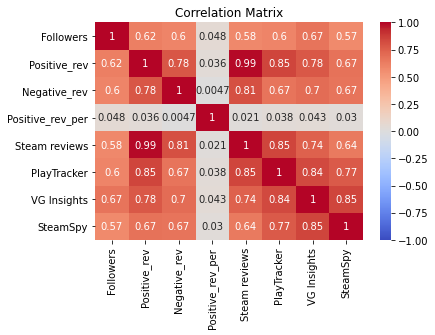

In [27]:
correlation_matrix = data_dvco.corr()
# 可视化相关性矩阵为热图
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

In [72]:
df[['Diagonal dominance normalization','Rule of thirds normalization','vertical physical visual balance normalization','horizontal physical visual balance normalization']].describe().T

,count,mean,std,min,25%,50%,75%,max
Diagonal dominance normalization,68897.0,0.673515,0.235046,0.0,0.508903,0.715179,0.873459,1.0
Rule of thirds normalization,68897.0,0.543393,0.125845,0.0,0.461143,0.548206,0.628929,1.0
vertical physical visual balance normalization,68897.0,0.586041,0.274067,0.0,0.377114,0.612621,0.820133,1.0
horizontal physical visual balance normalization,68897.0,0.516254,0.293242,0.0,0.260736,0.524447,0.772949,1.0


In [73]:
data_cv[['Diagonal dominance normalization','Rule of thirds normalization','vertical physical visual balance normalization','horizontal physical visual balance normalization','Followers','Positive_rev','Negative_rev','Positive_rev_per','Steam reviews','PlayTracker','VG Insights','SteamSpy']].corr()

,Diagonal dominance normalization,Rule of thirds normalization,vertical physical visual balance normalization,horizontal physical visual balance normalization,Followers,Positive_rev,Negative_rev,Positive_rev_per,Steam reviews,PlayTracker,VG Insights,SteamSpy
Diagonal dominance normalization,1.000000,-0.036590,-0.094190,0.207695,0.004276,0.001408,0.002676,0.004190,0.001156,0.000728,-0.000757,0.002266
Rule of thirds normalization,-0.036590,1.000000,-0.109679,0.008833,0.001766,-0.000140,0.001652,-0.010637,0.000247,0.003674,-0.000549,0.000565
vertical physical visual balance normalization,-0.094190,-0.109679,1.000000,0.068437,0.006007,0.004310,0.001545,-0.000360,0.003183,0.002139,0.004771,0.004237
horizontal physical visual balance normalization,0.207695,0.008833,0.068437,1.000000,0.009918,0.009646,0.009239,-0.004544,0.009600,0.004970,0.005784,0.005720
Followers,0.004276,0.001766,0.006007,0.009918,1.000000,0.621439,0.597278,0.039372,0.584263,0.598290,0.666043,0.575462
Positive_rev,0.001408,-0.000140,0.004310,0.009646,0.621439,1.000000,0.785108,0.026518,0.985725,0.851103,0.776557,0.674272
Negative_rev,0.002676,0.001652,0.001545,0.009239,0.597278,0.785108,1.000000,0.008109,0.806040,0.670450,0.698083,0.672110
Positive_rev_per,0.004190,-0.010637,-0.000360,-0.004544,0.039372,0.026518,0.008109,1.000000,0.015348,0.033248,0.031414,0.023745
Steam reviews,0.001156,0.000247,0.003183,0.009600,0.584263,0.985725,0.806040,0.015348,1.000000,0.847061,0.742377,0.643866
PlayTracker,0.000728,0.003674,0.002139,0.004970,0.598290,0.851103,0.670450,0.033248,0.847061,1.000000,0.835357,0.771266


In [29]:
for i in ['Followers','Positive_rev','Negative_rev','Positive_rev_per','Steam reviews','PlayTracker','VG Insights','SteamSpy']:
    data_cv_100[i] = (data_cv_100[i]-min(data_cv_100[i]))/(max(data_cv_100[i])-min(data_cv_100[i]))

<ipython-input-29-d4905f699bb2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cv_100[i] = (data_cv_100[i]-min(data_cv_100[i]))/(max(data_cv_100[i])-min(data_cv_100[i]))


In [30]:
data_cv_100[['Followers','Positive_rev','Negative_rev','Positive_rev_per','Steam reviews','PlayTracker','VG Insights','SteamSpy']].describe()

,Followers,Positive_rev,Negative_rev,Positive_rev_per,Steam reviews,PlayTracker,VG Insights,SteamSpy
count,39891.000000,39891.000000,39891.000000,39891.000000,3.989100e+04,39891.000000,3.989100e+04,3.989100e+04
mean,0.000885,0.000355,0.000398,0.744840,1.960197e-04,0.000927,9.215155e-04,5.561785e-04
std,0.007649,0.006155,0.007669,0.206365,5.869448e-03,0.007810,1.284801e-02,8.284420e-03
min,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000e+00
25%,0.000014,0.000003,0.000005,0.648400,2.337986e-08,0.000000,1.122143e-07,9.405126e-07
50%,0.000057,0.000010,0.000019,0.794900,7.273735e-07,0.000007,3.694297e-06,5.643075e-06
75%,0.000275,0.000046,0.000078,0.896800,3.498320e-06,0.000080,2.008774e-05,2.445333e-05
max,1.000000,1.000000,1.000000,1.000000,1.000000e+00,1.000000,1.000000e+00,1.000000e+00


<AxesSubplot:xlabel='Followers', ylabel='Density'>

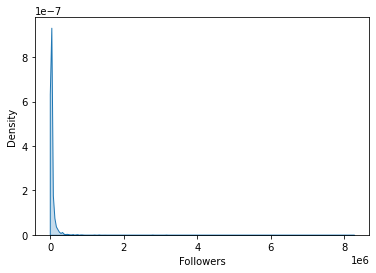

In [19]:
sns.kdeplot(data['Followers'], shade=True)


In [18]:
data[data['Followers']<=100].count()

Unnamed: 0           29124
AppID                29124
AppType              29124
Followers            29124
Positive_rev         29124
Negative_rev         29124
Positive_rev_per     29124
Steam reviews        29124
PlayTracker          29124
VG Insights          29124
SteamSpy             29124
Tags                 21964
Top-Level Genres     21535
Genres               14159
Sub-Genres           12353
Visuals&Viewpoint    15073
Themes&Moods         13268
Features             11901
Players              12192
Other Tags           15330
Software               952
Assessments           6521
Ratings etc           1581
Hardware/Input        1867
Funding etc           2986
dtype: int64

In [10]:
data_cv[['Diagonal dominance normalization','Rule of thirds normalization','vertical physical visual balance normalization','horizontal physical visual balance normalization','Followers','Positive_rev','Negative_rev','Positive_rev_per','Steam reviews','PlayTracker','VG Insights','SteamSpy']].corr()

,Diagonal dominance normalization,Rule of thirds normalization,vertical physical visual balance normalization,horizontal physical visual balance normalization,Followers,Positive_rev,Negative_rev,Positive_rev_per,Steam reviews,PlayTracker,VG Insights,SteamSpy
Diagonal dominance normalization,1.000000,-0.036590,-0.094190,0.207695,0.004276,0.001408,0.002676,0.004190,0.001156,0.000728,-0.000757,0.002266
Rule of thirds normalization,-0.036590,1.000000,-0.109679,0.008833,0.001766,-0.000140,0.001652,-0.010637,0.000247,0.003674,-0.000549,0.000565
vertical physical visual balance normalization,-0.094190,-0.109679,1.000000,0.068437,0.006007,0.004310,0.001545,-0.000360,0.003183,0.002139,0.004771,0.004237
horizontal physical visual balance normalization,0.207695,0.008833,0.068437,1.000000,0.009918,0.009646,0.009239,-0.004544,0.009600,0.004970,0.005784,0.005720
Followers,0.004276,0.001766,0.006007,0.009918,1.000000,0.621439,0.597278,0.039372,0.584263,0.598290,0.666043,0.575462
Positive_rev,0.001408,-0.000140,0.004310,0.009646,0.621439,1.000000,0.785108,0.026518,0.985725,0.851103,0.776557,0.674272
Negative_rev,0.002676,0.001652,0.001545,0.009239,0.597278,0.785108,1.000000,0.008109,0.806040,0.670450,0.698083,0.672110
Positive_rev_per,0.004190,-0.010637,-0.000360,-0.004544,0.039372,0.026518,0.008109,1.000000,0.015348,0.033248,0.031414,0.023745
Steam reviews,0.001156,0.000247,0.003183,0.009600,0.584263,0.985725,0.806040,0.015348,1.000000,0.847061,0.742377,0.643866
PlayTracker,0.000728,0.003674,0.002139,0.004970,0.598290,0.851103,0.670450,0.033248,0.847061,1.000000,0.835357,0.771266
